In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import scipy.stats as stats

In [2]:
# Set path for data source
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Load Diffusion/dataset/")

Mounted at /content/gdrive


In [3]:
evaluation_path = "./evaluations"
os.listdir(evaluation_path)

['All_model_metrics_agg_by_meta_168x168.csv',
 'CVAE_metrics.csv',
 'CGAN_metrics.csv',
 'old',
 'diffusion_model_metrics.csv',
 'epochs_metrics.csv',
 'CVAE_mse_metrics.csv',
 'updated_All_model_metrics_agg_by_meta_168x168.csv']

In [4]:
# Read the All_model_metrics_agg_by_meta.csv file
All_model_metrics_agg_by_meta = pd.read_csv(os.path.join(evaluation_path,'updated_All_model_metrics_agg_by_meta_168x168.csv'))
All_model_metrics_agg_by_meta['model'] = All_model_metrics_agg_by_meta['model'].replace({'diffusion_model':'Diffusion model'})
All_model_metrics_agg_by_meta['agg_item'] = All_model_metrics_agg_by_meta['agg_item'].replace({'Public services':' Public\n   services', 'Lodging/residential':'Lodging/\nresidential', 'Entertainment/public assembly':'Entertainment/\npublic assembly'})

All_model_metrics_agg_by_meta

,rmse,mae,r2,kl_divergence,cosine_similarity,pearson_correlation,fid_score,model,agg_col,agg_item
0,0.281076,0.229512,-1.291410,0.805132,0.665435,0.451182,2239.657180,CVAE_mse,lat,51.49783804108846
1,0.243607,0.194226,-0.846401,0.285924,0.812821,0.320234,1130.796505,CVAE_mse,lat,38.9035039800032
2,0.224466,0.181437,-0.484201,0.225437,0.855348,0.513794,1423.362447,CVAE_mse,lat,37.87190340000004
3,0.311083,0.263765,-0.780368,1.005591,0.618827,0.271676,4184.534050,CVAE_mse,lat,51.49984
4,0.238333,0.194005,-0.799944,0.290366,0.822118,0.344905,1135.184288,CVAE_mse,lat,30.26719999999989
...,...,...,...,...,...,...,...,...,...,...
64,0.229682,0.186620,-0.794682,0.235104,0.847500,0.386893,612.868489,Diffusion model,meter_type,electricity
65,0.319737,0.267946,-1.601893,0.923381,0.631253,0.379522,1674.711799,Diffusion model,meter_type,gas
66,0.240481,0.197198,-8.304000,0.424493,0.820654,0.582405,669.346417,Diffusion model,meter_type,chilledwater
67,0.296477,0.248466,-1.640299,0.709824,0.684645,0.253114,1275.897124,Diffusion model,meter_type,hotwater


In [9]:
All_model_metrics_agg_by_meta['model'] = All_model_metrics_agg_by_meta['model'].replace({'CVAE_mse':'CVAE'})

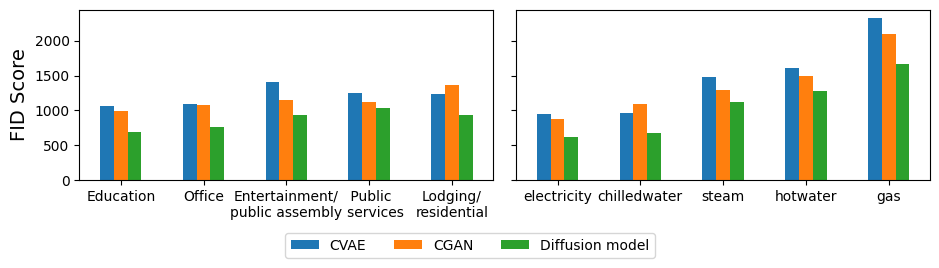

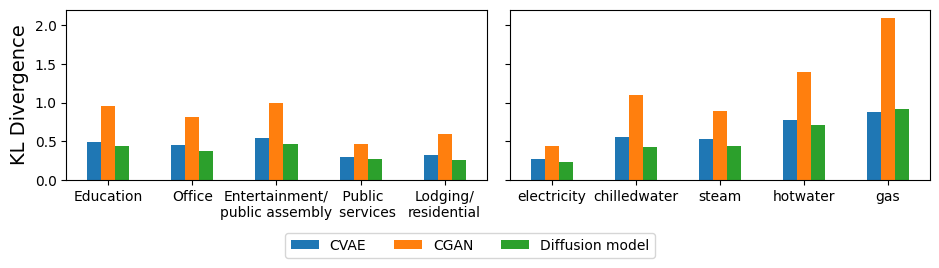

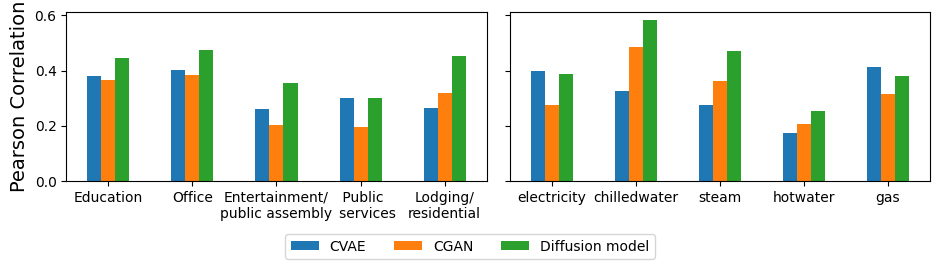

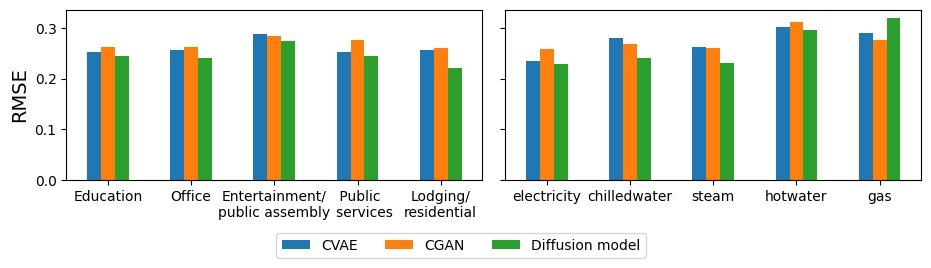

In [10]:
# Create figures folder if it doesn't exist
figures_path = "./figures"
os.makedirs(figures_path, exist_ok=True)

# Create a mapping dictionary for the metric names
metric_names = {
    'fid_score': 'FID Score',
    'kl_divergence': 'KL Divergence',
    'pearson_correlation': 'Pearson Correlation',
    'rmse': 'RMSE',
}

metrics_to_summarize = list(metric_names.keys())
agg_col_list = ['building_type', 'meter_type']

for metric in metrics_to_summarize:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9.5, 3), sharey=True)  # Increased the width to make room for the legend

    for idx, agg_col in enumerate(agg_col_list):
        df_plot = All_model_metrics_agg_by_meta[All_model_metrics_agg_by_meta['agg_col'] == agg_col].copy()

        ax = axes[idx]
        df_plot = df_plot.pivot_table(columns='model', index='agg_item', values=metric)

        try:
            df_plot = df_plot.loc[['electricity', 'chilledwater', 'steam', 'hotwater', 'gas'], ['CVAE', 'CGAN', 'Diffusion model']]
        except:
            df_plot = df_plot.loc[['Education', 'Office', 'Entertainment/\npublic assembly', ' Public\n   services', 'Lodging/\nresidential'], ['CVAE', 'CGAN', 'Diffusion model']]

        df_plot.plot(kind='bar', ax=ax, legend=False)  # Temporarily set legend to False

        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.set_xlabel('')

        # Set y_label using the mapping dictionary
        ax.set_ylabel(metric_names[metric],fontsize=14)

    # Adding legend at the bottom in horizontal direction
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, 0.1))

    plt.tight_layout(rect=[0, 0.2, 1, 1])  # Make adjustments to rect to avoid clipping

    # Save the figure to the specified path with 300 dpi resolution
    figure_name = f"{metric}_comparison.png"
    full_figure_path = os.path.join(figures_path, figure_name)
    plt.savefig(full_figure_path, dpi=300, bbox_inches='tight')

    plt.show()


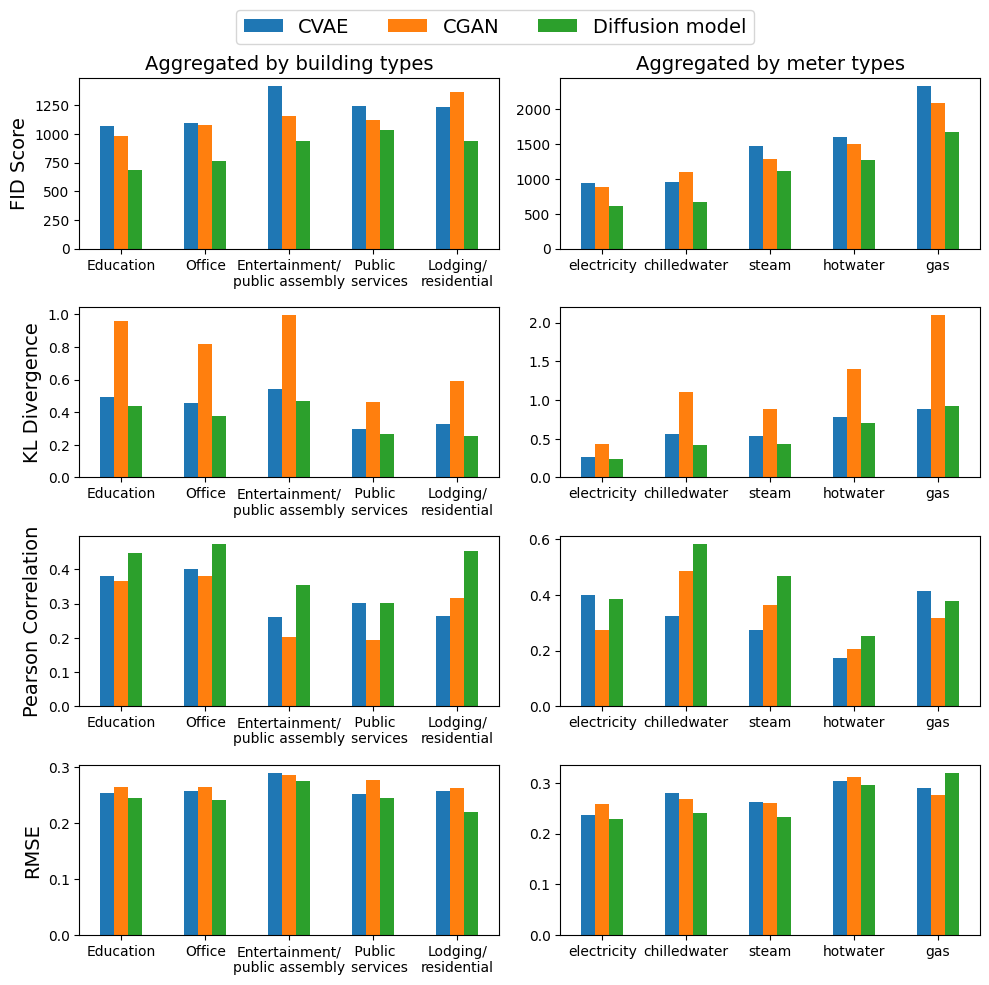

In [11]:
# Create figures folder if it doesn't exist
figures_path = "./figures"
os.makedirs(figures_path, exist_ok=True)

# Create a mapping dictionary for the metric names
metric_names = {
    'fid_score': 'FID Score',
    'kl_divergence': 'KL Divergence',
    'pearson_correlation': 'Pearson Correlation',
    'rmse': 'RMSE',
}

metrics_to_summarize = list(metric_names.keys())
agg_col_list = ['building_type', 'meter_type']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharey=False)  # Adjusted to a 4x2 grid

for i, metric in enumerate(metrics_to_summarize):
    for j, agg_col in enumerate(agg_col_list):
        df_plot = All_model_metrics_agg_by_meta[All_model_metrics_agg_by_meta['agg_col'] == agg_col].copy()

        ax = axes[i, j]  # Adjusted for 4x2 grid
        df_plot = df_plot.pivot_table(columns='model', index='agg_item', values=metric)

        try:
            df_plot = df_plot.loc[['electricity', 'chilledwater', 'steam', 'hotwater', 'gas'], ['CVAE', 'CGAN', 'Diffusion model']]
        except:
            df_plot = df_plot.loc[['Education', 'Office', 'Entertainment/\npublic assembly', ' Public\n   services', 'Lodging/\nresidential'], ['CVAE', 'CGAN', 'Diffusion model']]

        df_plot.plot(kind='bar', ax=ax, legend=False)  # Temporarily set legend to False

        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.set_xlabel('')

        # Set y_label using the mapping dictionary, remove label for 2nd column
        if j == 0:
            ax.set_ylabel(metric_names[metric], fontsize=14)
            if i == 0:  # Add title only for the first row
                ax.set_title('Aggregated by building types', fontsize=14)
        else:
            ax.set_ylabel('')
            if i == 0:  # Add title only for the first row
                ax.set_title('Aggregated by meter types', fontsize=14)

    # Only add legend in the first row
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, 1.04), fontsize=14)  # Adjusted bbox_to_anchor

plt.tight_layout(rect=[0, 0.05, 1, 1])  # Make adjustments to rect to avoid clipping

# Save the figure to the specified path with 300 dpi resolution
figure_name = "metrics_comparison.png"
full_figure_path = os.path.join(figures_path, figure_name)
plt.savefig(full_figure_path, dpi=300, bbox_inches='tight')

plt.show()


In [12]:
metrics_to_summarize = ['fid_score', 'kl_divergence', 'pearson_correlation', 'rmse']
agg_col_list = ['building_type', 'meter_type']

for metric in metrics_to_summarize:

    for idx, agg_col in enumerate(agg_col_list):
        df_plot = All_model_metrics_agg_by_meta[All_model_metrics_agg_by_meta['agg_col'] == agg_col].copy()

        ax = axes[idx]
        df_plot = df_plot.pivot_table(columns='model', index='agg_item', values=[metric])

        display(df_plot)

fid_score                             
model                                   CGAN         CVAE Diffusion model
agg_item                                                                 
 Public\n   services             1120.451872  1246.482080     1033.138962
Education                         985.189658  1070.587408      684.737665
Entertainment/\npublic assembly  1156.723216  1414.226977      935.211309
Lodging/\nresidential            1364.708695  1239.353016      939.618054
Office                           1074.402250  1092.902148      760.449858

fid_score                             
model                CGAN         CVAE Diffusion model
agg_item                                              
chilledwater  1099.857970   957.759249      669.346417
electricity    880.365833   947.253846      612.868489
gas           2096.286150  2328.424791     1674.711799
hotwater      1496.477196  1609.699088     1275.897124
steam         1291.772141  1479.068535     1116.953566

kl_divergence                          
model                                    CGAN      CVAE Diffusion model
agg_item                                                               
 Public\n   services                 0.461519  0.296735        0.266715
Education                            0.960180  0.490763        0.439487
Entertainment/\npublic assembly      0.995222  0.542545        0.469912
Lodging/\nresidential                0.591076  0.328186        0.253908
Office                               0.818611  0.454709        0.377480

kl_divergence                          
model                 CGAN      CVAE Diffusion model
agg_item                                            
chilledwater      1.105461  0.556201        0.424493
electricity       0.436708  0.270458        0.235104
gas               2.094950  0.882706        0.923381
hotwater          1.396212  0.774663        0.709824
steam             0.886485  0.535734        0.434543

pearson_correlation                          
model                                          CGAN      CVAE Diffusion model
agg_item                                                                     
 Public\n   services                       0.194572  0.301127        0.300629
Education                                  0.367357  0.381143        0.446846
Entertainment/\npublic assembly            0.203485  0.261274        0.353149
Lodging/\nresidential                      0.317838  0.264001        0.452662
Office                                     0.382277  0.400208        0.474313

pearson_correlation                          
model                       CGAN      CVAE Diffusion model
agg_item                                                  
chilledwater            0.485732  0.325464        0.582405
electricity             0.273707  0.399079        0.386893
gas                     0.315765  0.412670        0.379522
hotwater                0.207325  0.172873        0.253114
steam                   0.363678  0.274220        0.469417

rmse                          
model                                CGAN      CVAE Diffusion model
agg_item                                                           
 Public\n   services             0.277068  0.251804        0.244287
Education                        0.263199  0.252427        0.244130
Entertainment/\npublic assembly  0.284803  0.289106        0.275050
Lodging/\nresidential            0.261579  0.257481        0.220147
Office                           0.263110  0.256180        0.241103

rmse                          
model             CGAN      CVAE Diffusion model
agg_item                                        
chilledwater  0.268461  0.280241        0.240481
electricity   0.259282  0.235748        0.229682
gas           0.276755  0.290329        0.319737
hotwater      0.311656  0.302831        0.296477
steam         0.261048  0.262176        0.231861